# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Checking the number of mice.
len(complete_data["Mouse ID"].unique())

249

In [17]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = complete_data[complete_data.duplicated(['Mouse ID', 'Timepoint'])]
len(duplicate)

5

In [55]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = complete_data.loc[complete_data["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
show_duplicates_df = complete_data[complete_data['Mouse ID'].isin(dup_mice_df)==False]
show_duplicates_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [59]:
# Checking the number of mice in the clean DataFrame.
print(len(cleandata["Mouse ID"].unique()))

249


## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_reg = cleandata.groupby(["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumormean = drug_reg["Tumor Volume (mm3)"].mean()
tumormedian = drug_reg["Tumor Volume (mm3)"].median()
tumorvariance = drug_reg["Tumor Volume (mm3)"].var()
tumorstd = drug_reg["Tumor Volume (mm3)"].std()
tumorsem = drug_reg["Tumor Volume (mm3)"].sem()

tumor_summary = pd.DataFrame({ "Mean Tumor Volume": tumormean, 
                                    "Median Tumor Volume": tumormedian, 
                                    "Variance Tumor Volume": tumorvariance, 
                                    "Standard Deviation Tumor Volume": tumorstd,
                                     "SEM Tumor Volume": tumorsem
    
    
})
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_single = drug_reg["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

tumor_summary_single 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Treated')

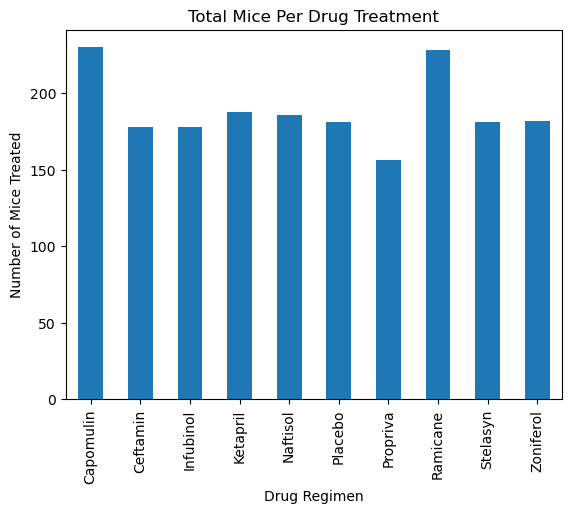

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
micetimepoints = cleandata.groupby(["Drug Regimen"]).count()["Mouse ID"]

barpandas = micetimepoints.plot.bar(x='Drug Regimen', y='Mouse ID', rot=90)
plt.title("Total Mice Per Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Treated")


<function matplotlib.pyplot.show(close=None, block=None)>

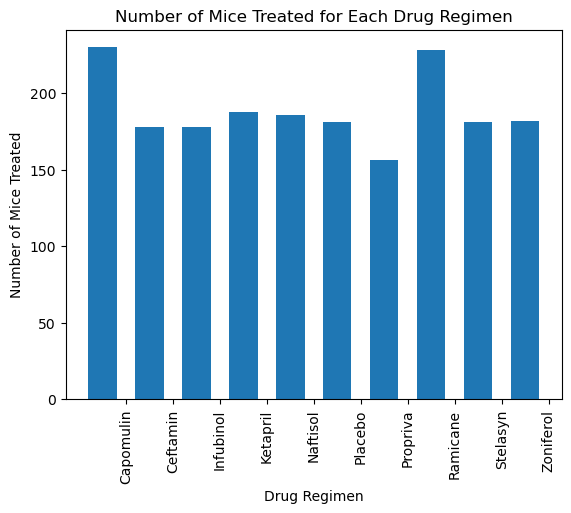

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

xaxis = np.arange(len(micetimepoints))
yaxis = micetimepoints

plt.bar(xaxis,yaxis,width=0.6,align="center")

ticks = [value+0.5 for value in xaxis]
plt.xticks(ticks, micetimepoints.index.values, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Treated")
plt.title("Number of Mice Treated for Each Drug Regimen")

plt.show


<Axes: >

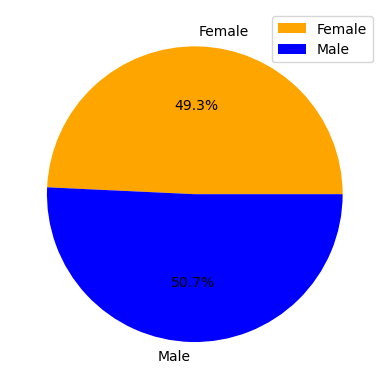

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
micegender = cleandata.groupby(["Sex"]).count()
micegender

piepandas = micegender.plot.pie(y="Mouse ID", colors = ["orange","blue"],startangle=0, autopct='%1.1f%%')

piepandas.set_ylabel("") 

piepandas

([<matplotlib.patches.Wedge at 0x164c86d40>,
 [Text(-0.02562299800632484, -1.099701533132135, 'Female'),
  Text(0.025623100967813093, 1.099701530733132, 'Male')],
 [Text(-0.013976180730722638, -0.5998371998902553, '49.3%'),
  Text(0.013976236891534414, 0.5998371985817083, '50.7%')])

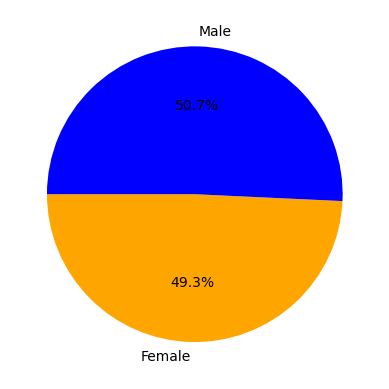

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
micegender
labels = ["Female", "Male"]
colors = ["orange", "blue"]

plt.pie(micegender["Mouse ID"], labels=labels, colors=colors, startangle=180, autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
finalvol = cleandata.groupby(["Mouse ID"])["Timepoint"].max()
finalvol

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
finalvolmerged = pd.merge(finalvol, cleandata, on=(["Mouse ID", "Timepoint"]))
finalvolmerged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorvolume = finalvolmerged.loc[finalvolmerged["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumorvolume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorvolume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"For {treatment} values below {lower_bound} and above {upper_bound} are outliers.")

For Capomulin values below 20.70456164999999 and above 51.83201549 are outliers.
For Ramicane values below 17.912664470000003 and above 54.30681135 are outliers.
For Infubinol values below 36.83290494999999 and above 82.74144559000001 are outliers.
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 are outliers.


([<matplotlib.axis.XTick at 0x164cc32e0>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

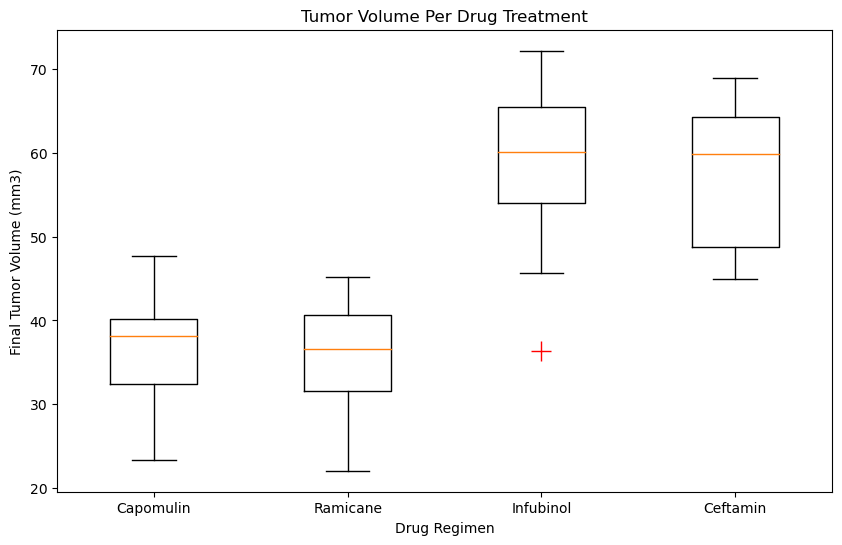

In [36]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1,ax1 = plt.subplots(figsize=(10,6))

flierprops = dict(marker='+', markerfacecolor='g', markersize=15,
                  linestyle='none', markeredgecolor='r')
ax1.boxplot(tumor_vol_data, flierprops=flierprops)

ax1.set_title('Tumor Volume Per Drug Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

## Line and Scatter Plots

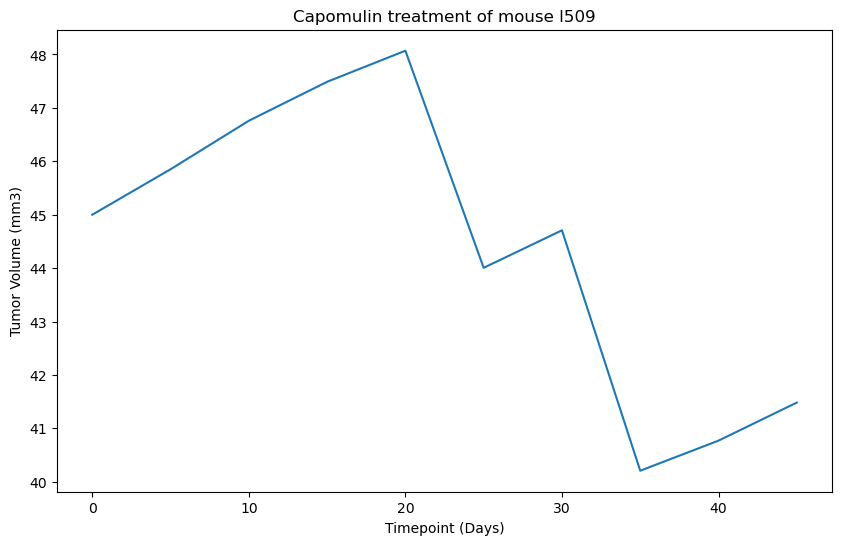

In [78]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_treatment = complete_data.loc[complete_data["Drug Regimen"] == "Capomulin"]
cap_treatment.value_counts("Mouse ID")

#choose mouse t565 and isolate her data
l509 = complete_data.loc[complete_data["Mouse ID"] == "l509"]
l509

fig1,ax1 = plt.subplots(figsize=(10,6))
#make x & y axes
cap_xaxis = l509["Timepoint"]
cap_yaxis = l509["Tumor Volume (mm3)"]
plt.plot(cap_xaxis, cap_yaxis)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

TypeError: Could not convert CapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulin to numeric

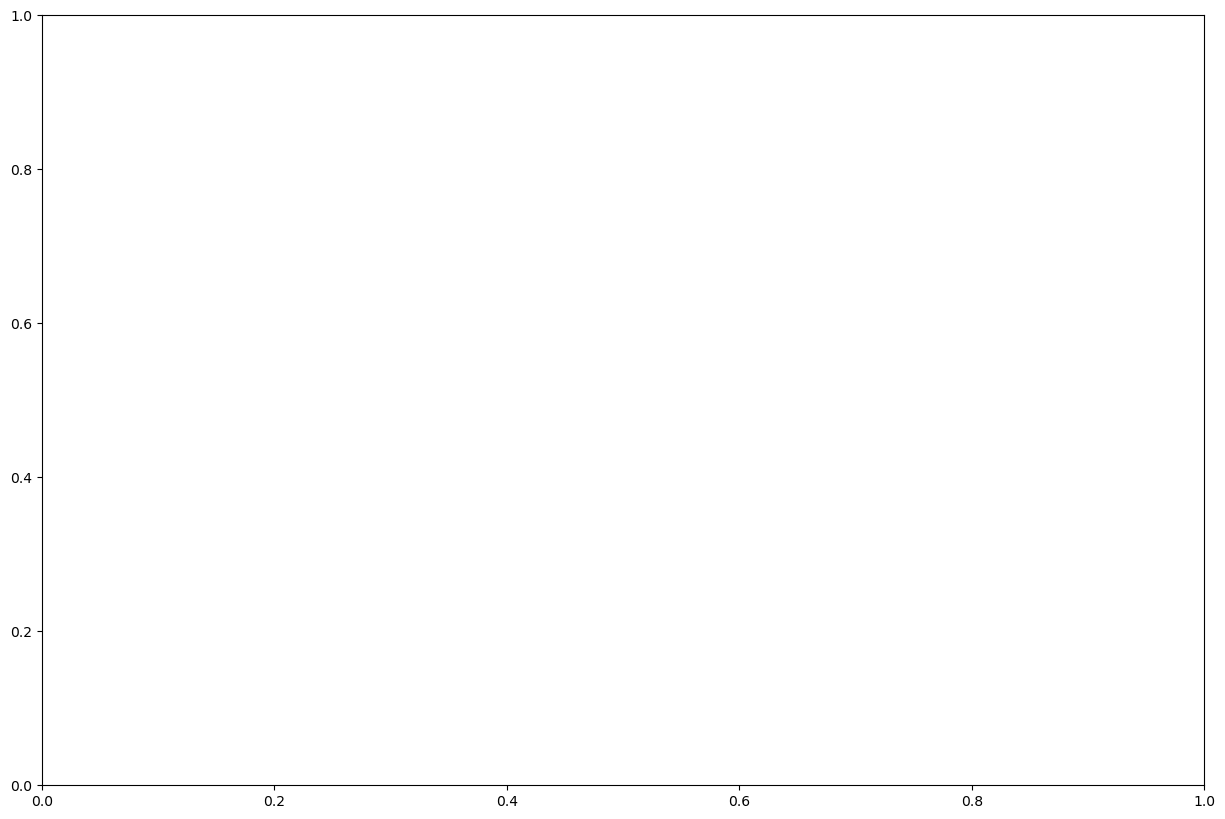

In [93]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capm_vol =cap_treatment.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)


## Correlation and Regression

In [76]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
